In [2]:
from sklearn import datasets
import numpy as np

In [3]:
iris = datasets.load_iris()
X = iris.data[:,[2,3]]
y = iris.target
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3,\
                                                    random_state=0)
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [5]:
from sklearn.linear_model import Perceptron
ppn = Perceptron(eta0=0.1,random_state=0,max_iter=40)
ppn.fit(X_train_std,y_train)

Perceptron(eta0=0.1, max_iter=40)

In [6]:
y_pred = ppn.predict(X_test_std)
print('Чиcлo ошибочно классифицированных образцов: % d' % (y_test != y_pred).sum())

Чиcлo ошибочно классифицированных образцов:  5


In [7]:
from sklearn.metrics import accuracy_score
print('Bepнocть: %.2f' % accuracy_score(y_test, y_pred))

Bepнocть: 0.89


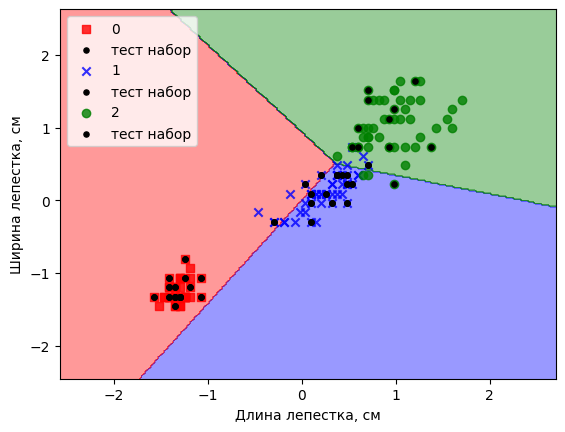

In [8]:
# Визуализация разделительной границы
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):
# Настро ить генерато р маркеров и палитру
    markers = ('s', 'x', 'o', '>', 'v')
    colors = ( 'red', 'blue', 'green', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    # Вывести поверхность решения
    xl_min, xl_max = X[:, 0] .min() - 1, X[:, 0] .max() + 1
    x2_min, x2_max = X[:, 1] .min() - 1, X[:, 1] .max() + 1
    xxl, xx2 = np.meshgrid(np.arange(xl_min, xl_max, resolution),
        np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xxl.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xxl.shape)
    plt.contourf(xxl, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xxl.min (), xxl.max())
    plt.ylim(xx2.min(), xx2.max())
    # По казать образцы классов
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8,
            color=cmap(idx), marker=markers[idx], label=cl)
        if test_idx:
            X_test, y_test = X[test_idx,:],y[test_idx]
            plt.scatter(X_test[:,0],X_test[:,1],c='0',alpha=1.0,\
                        linewidths=1,marker='.',s=55,label='тест набор')

X_combined_std = np.vstack((X_train_std, X_test_std))
Y_combined_std = np.hstack((y_train, y_test))
# Нарисовать картинку
plot_decision_regions(X_combined_std, Y_combined_std, classifier=ppn,\
                      test_idx=range(105,150))
plt.xlabel('Длина лепестка, см')
plt.ylabel('Ширина лепестка, см')
plt.legend(loc='upper left')
plt.show()